## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

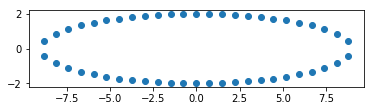

In [3]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

In [5]:
print(X.shape)
print(Y.shape)

(50,)
(50,)


In [13]:
def draw_regression_line (x,y,m,b):
    regression_line =[]
    for x in x:
        regression_line.append((m*x)+b)
    return regression_line

In [20]:
def SGD_regressor(x,y, alpha_values, outlier_value):
    
    x_list = []
    y_list = [] 
    rows = 3
    col = 5
    fcount=1
    
    # For each alpha value in the list of alpha values,
    for alpha in alpha_values:
        x_list=x
        y_list=y
        plt.figure(figsize = (20,20))
        print("best fit linear regression line for alpha:", alpha)
        for l in outlier_value :
            x_list=np.append(x_list,l[0])
            y_list=np.append(y_list,l[1])
            
            X_new = x_list.reshape(-1, 1)
            Y_new = y_list.reshape(-1, 1)
                     
            sgd_regressor = SGDRegressor(alpha=alpha, eta0=0.001, learning_rate='constant',random_state=0)
            sgd_regressor.fit(X_new, Y_new)
            w = sgd_regressor.coef_
            b = sgd_regressor.intercept_
            
            y_predicted = sgd_regressor.predict(X_new)
            line = draw_regression_line (X_new,y_predicted,w,b)
            
            plt.subplot(rows, col, fcount)          
            plt.scatter(X_new, Y_new,color = 'blue' )
            plt.plot(X_new, line) 
            
            fcount=fcount+1
        plt.show()

best fit linear regression line for alpha: 0.0001


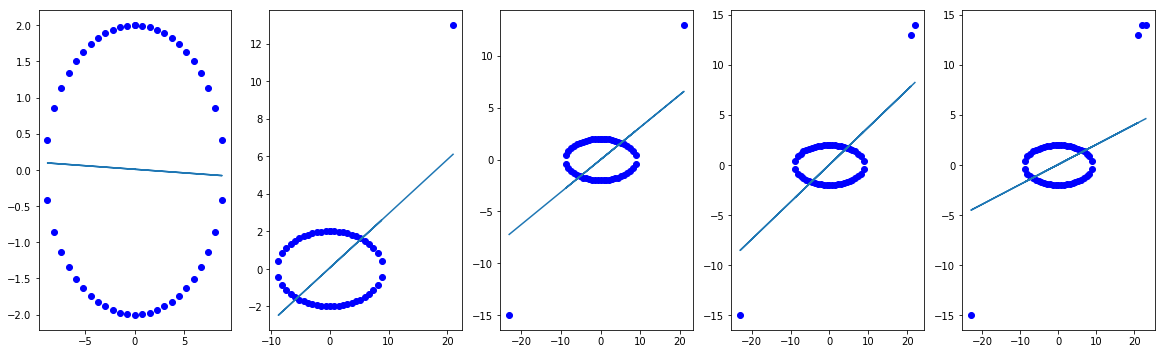

best fit linear regression line for alpha: 1


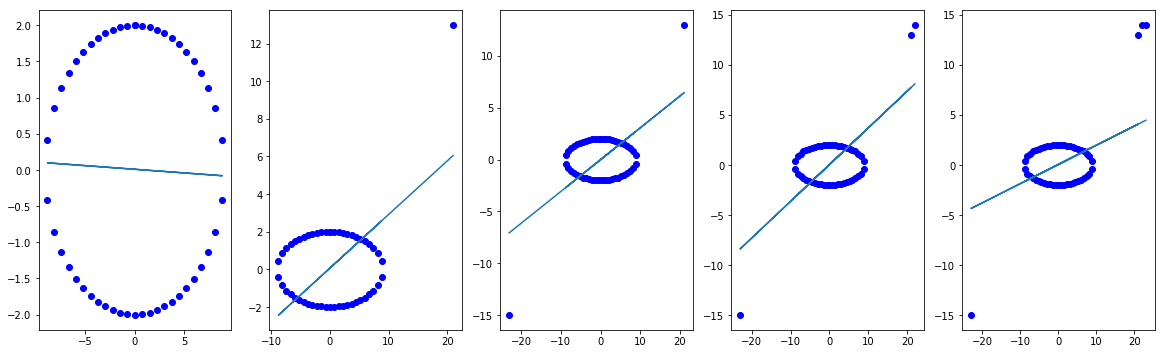

best fit linear regression line for alpha: 100


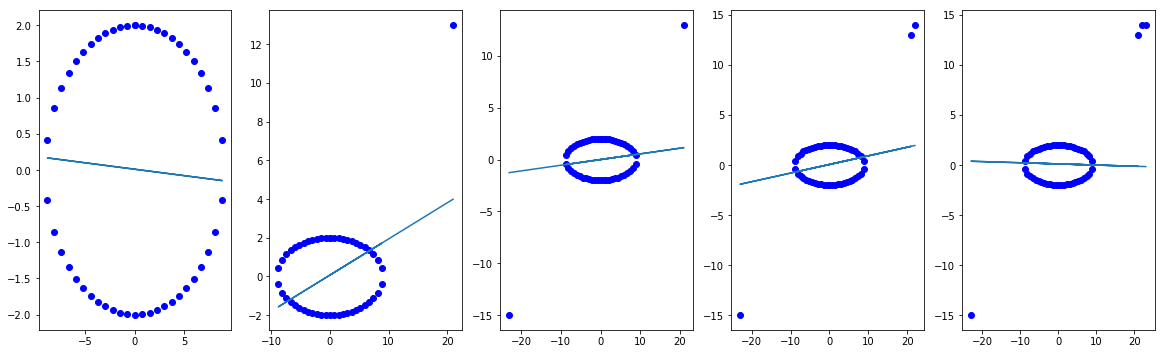

In [21]:
# SGD Regressor Function calling 
alpha = [0.0001, 1, 100]
outliers =  [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] 
SGD_regressor(X,Y, alpha, outliers )

Observation :
            To achieve the goal, Visualization best fit linear regression line for different regularizations, I plot 3 * 5 grid 
of subplots for regularizations alpha=[0.0001, 1, 100] and observed how prediction hyperplane moved with respect to the 
outliers.Sgd_regressor model learns the data and the outliers as outliers are increasing to the extent and it impacts somehow 
on the performance on the model on new data. It indicates that , the random fluctuations of the outliers is catched and 
accpected as a data by the model.This looks like an overfitting to me for the alpha values beacuse the plots for all the alpha 
are nearly same , specially for 0.0001 and 1. For 100 the plot is little bit different but if i train for for too long, 
the performance on the training dataset may continue to decrease because the model is overfitting .